# Light Cuve project 

## What is  light Cuve?
Is the graph that shows the variation of the braightness of an astronomical object over time.

## Overview
**Notebook Author:** Topollo Naketsana (University of the Western Cape)<br>



### Objective and Motivation

The goal of this project is to generate light curve from large dataset from Gaia telescope.

### Motivation
Light-Curve can help us study the behavior of variable stars, eclipsing binaries, exoplanets, and other objects that shows changes in brightness.

### Required dependencies

### Python modules used in this project can be install using the following line (you need python3 to run the following line)
### install python 3 [here](https://www.python.org/downloads/)

* pandas
* seaborn
* matplotlib
* astropy
* numpy
* scipy 



In [353]:
!pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable


In [354]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from astropy.timeseries import LombScargle
from scipy import stats

In [355]:
# upack data
df = pd.read_csv('./data/light_curves_2888421379791798656_2920432350870545280.csv')

In [356]:
df

,source_id,transit_id,band,time,mag,flux,flux_error,flux_over_error,rejected_by_photometry,rejected_by_variability,other_flags,solution_id
0,2888421379791798656,18097561196185160,G,1724.129144,14.848433,21675.694839,46.572834,465.414980,False,False,4194817,369295549951641967
1,2888421379791798656,18561527015683277,G,1732.520199,14.609752,27005.092554,40.505355,666.704200,False,False,1,369295549951641967
2,2888421379791798656,18565619293000074,G,1732.594209,14.754270,23639.496416,30.058065,786.461000,False,False,1,369295549951641967
3,2888421379791798656,20223969668933227,G,1762.586037,14.781354,23057.100814,36.750823,627.390100,False,False,1,369295549951641967
4,2888421379791798656,20233710481203819,G,1762.762201,14.675042,25429.011026,36.934728,688.485170,False,False,1,369295549951641967
...,...,...,...,...,...,...,...,...,...,...,...,...
127478,2920432350870545280,44399714193666348,RP,2199.794230,15.083732,7434.904358,88.076895,84.413790,False,False,0,369295549951641967
127479,2920432350870545280,47094600400905727,RP,2248.528325,15.109491,7260.585294,87.596496,82.886710,False,False,0,369295549951641967
127480,2920432350870545280,47098692647425761,RP,2248.602326,15.080481,7457.198886,86.668078,86.043205,False,False,0,369295549951641967
127481,2920432350870545280,48701781754949905,RP,2277.591596,15.087089,7411.947515,84.614338,87.596825,False,False,0,369295549951641967


### EDA - The exploratory data analysis

In [357]:
# dataset infomation
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127483 entries, 0 to 127482
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   source_id                127483 non-null  int64  
 1   transit_id               127483 non-null  int64  
 2   band                     127483 non-null  object 
 3   time                     127483 non-null  float64
 4   mag                      127483 non-null  float64
 5   flux                     127483 non-null  float64
 6   flux_error               127483 non-null  float64
 7   flux_over_error          127483 non-null  float64
 8   rejected_by_photometry   127483 non-null  bool   
 9   rejected_by_variability  127483 non-null  bool   
 10  other_flags              127483 non-null  int64  
 11  solution_id              127483 non-null  int64  
dtypes: bool(2), float64(5), int64(4), object(1)
memory usage: 10.0+ MB


In [358]:
df.describe()

,source_id,transit_id,time,mag,flux,flux_error,flux_over_error,other_flags,solution_id
count,1.274830e+05,1.274830e+05,127483.000000,127483.000000,1.274830e+05,1.274830e+05,127483.000000,1.274830e+05,1.274830e+05
mean,2.911870e+18,3.300409e+16,1993.707714,15.672236,6.927069e+05,9.949769e+03,228.354400,2.649224e+05,3.692955e+17
std,7.901725e+15,9.972410e+15,180.345712,2.210572,1.263385e+07,2.564783e+05,320.643265,1.068971e+06,5.637212e+08
min,2.888421e+18,1.798638e+16,1722.118064,2.899528,1.037489e+00,9.433794e-01,0.017620,0.000000e+00,3.692955e+17
25%,2.910738e+18,2.326443e+16,1817.573492,14.675592,2.138400e+03,2.992749e+01,46.211662,0.000000e+00,3.692955e+17
50%,2.915373e+18,3.208974e+16,1977.166496,15.890243,5.386846e+03,5.873536e+01,101.678220,0.000000e+00,3.692955e+17
75%,2.917327e+18,4.380942e+16,2189.118940,16.985254,1.699674e+04,1.028704e+02,275.653790,1.000000e+00,3.692955e+17
max,2.920432e+18,5.022191e+16,2305.080771,25.311429,5.558490e+08,2.486537e+07,13824.642000,8.356355e+06,3.692956e+17


In [359]:
df.dtypes

source_id                    int64
transit_id                   int64
band                        object
time                       float64
mag                        float64
flux                       float64
flux_error                 float64
flux_over_error            float64
rejected_by_photometry        bool
rejected_by_variability       bool
other_flags                  int64
solution_id                  int64
dtype: object

In [360]:
# the missing values
df.isna().sum().sum()

0

#### The color bands: 

In [361]:
# the bands and their counts
df['band'].value_counts()

G     45273
BP    41233
RP    40977
Name: band, dtype: int64

In [362]:
# correllations - hows everything related to the mag
corr = df.corr(numeric_only= True)
print(corr['flux'].sort_values(ascending= False))

flux                       1.000000
flux_error                 0.852612
rejected_by_variability    0.129606
transit_id                 0.010668
time                       0.010668
other_flags                0.002856
flux_over_error           -0.008073
source_id                 -0.013790
solution_id               -0.024991
mag                       -0.253761
rejected_by_photometry          NaN
Name: flux, dtype: float64


In [363]:
# checking duplicates
df.duplicated().sum()

0

In [364]:
# checking the outliers using zscore
def check_outliers(data, threshold= 3):
    numeric_data = data.select_dtypes(include= [np.number])   # only numerics
    z = np.abs(stats.zscore(numeric_data))
    return z > threshold

# check outliers
outliers = check_outliers(df)
print(outliers.mean())

source_id          0.000000
transit_id         0.000000
time               0.000000
mag                0.018018
flux               0.002165
flux_error         0.001851
flux_over_error    0.021932
other_flags        0.056917
solution_id        0.032475
dtype: float64


In [365]:
# Remove outliers - any row with an outlier
cleaned_data = df[(~outliers).any(axis= 1)]

In [366]:
# size of cleaned data 
cleaned_data.shape

(127483, 12)

In [367]:
###################

In [368]:
###################

In [369]:
###################

### Visualization using the cleaned data

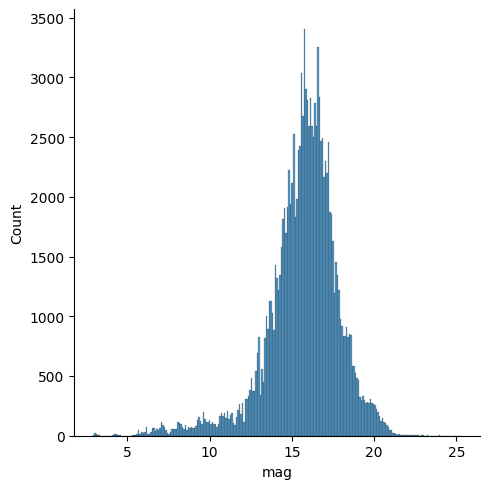

In [370]:
# ploting the distribution of the mag to see where it ranges
sns.displot(cleaned_data['mag'])

#### From the distribution plot of mag, its clear that the magnitude is rougly 2 < mag < 25, but mostly distributed around 14 - 20

<AxesSubplot:xlabel='band', ylabel='count'>

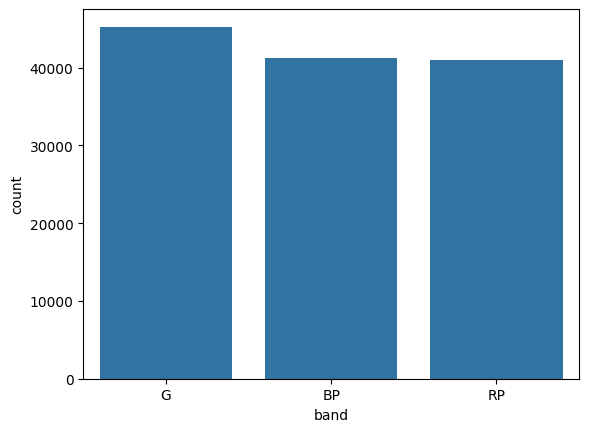

In [371]:
# Categorical representation of color band G, BP and RP  
sns.countplot(x= 'band', data= cleaned_data)

Text(0, 0.5, 'Magnitude')

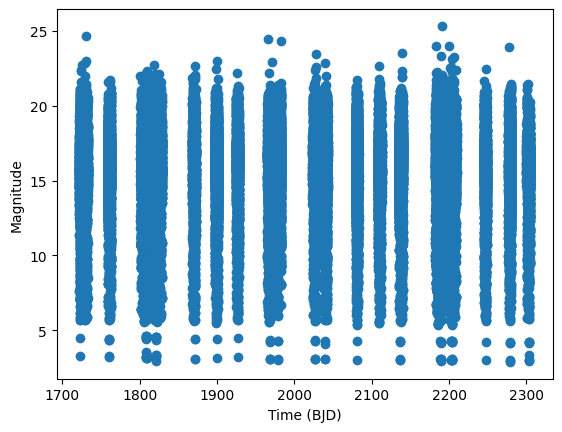

In [372]:
# plot 
plt.scatter(df['time'], df['mag'])

plt.xlabel('Time (BJD)')
plt.ylabel('Magnitude')

### Extracting the period from light curve data 

We use the method called 'a Periodogrm' - the method that uses the statistical tool to extract the frequency signals. It is based on the Least square fit of sinusoids, it is similar to the Fourier Analysis.

We use a special kind of periodogram called the Lomb-Scargle (LS) periodogram (after Lomb<a href="#ref1">[1]</a>, and Scargle[\[2\]](#ref2)).

### The background:


In [373]:
time = cleaned_data['time']
flux = cleaned_data['flux']
flux_err = cleaned_data['flux_error']

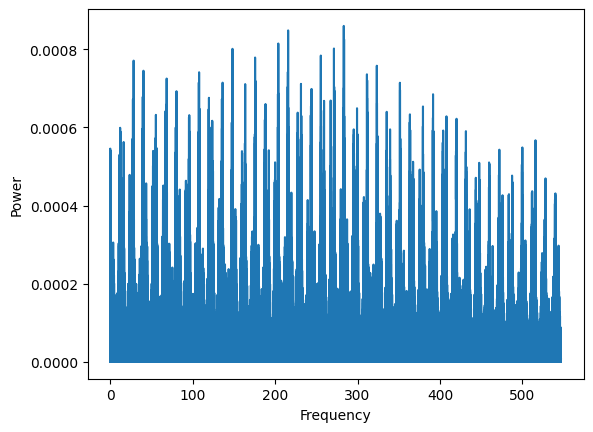

Best Period Found: 0.0035


In [374]:
# the Lomb_Scargle function
def lomb_scargle(time, flux, flux_err):
    freq, power = LombScargle(time, flux).autopower()
    best_freq = freq[np.argmax(power)]
    
    # plot of freq and power
    plt.plot(freq, power)
    plt.xlabel('Frequency')
    plt.ylabel('Power')
    plt.show()
    
    period = 1 / best_freq
    print(f'Best Period Found: {period:.4f}')
    return period           # returning the period = 1 / freq

period = lomb_scargle(time, flux, flux_err)

In [375]:
# Phase folding using the approximated period
def phase_fold(time, flux, period):
    phases = np.remainder(time, period) / period
    phases = np.concatenate((phases, phases + 1))
    flux = np.concatenate((flux, flux))
    plt.scatter(phases, flux, marker= '.')
    plt.xlabel('Phase')
    plt.ylabel('Brightness')
    
    print(period)

In [376]:
def plot_best_period(time, flux, flux_err):
    phase_fold(time, flux, lomb_scargle(time, flux, flux_err))

0.003529208074384729


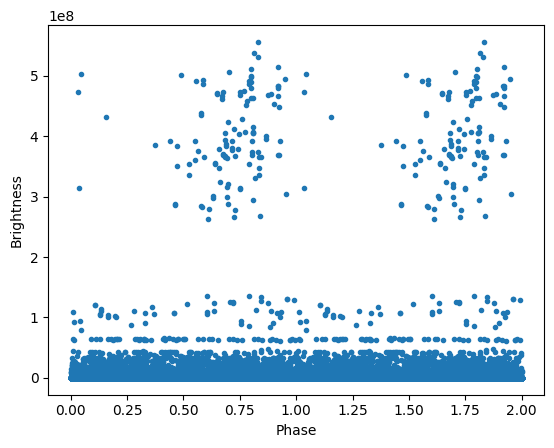

In [377]:
phase_fold(time, flux, period)

##################################################

### try FFT

In [ ]:
# 